# 介紹

到目前為止，在本課程中，我們已經了解了神經網絡如何解決迴歸問題。現在我們要將神經網絡應用於另一個常見的機器學習問題：分類。到目前為止，我們學到的大部分內容仍然適用。主要區別在於我們使用的損失函數以及我們希望最終層產生什麼樣的輸出。

# 二進制分類 #

分類為兩個類別之一是一個常見的機器學習問題。我們可能想要預測客戶是否可能進行購買、信用卡交易是否具有欺詐性、深空信號是否顯示新行星的證據或疾病的醫學測試證據。這些都是**二元分類**問題。

在我們的原始數據中，這些類可能由字符串表示，例如`Yes`和`No`，或`Dog`和`Cat`。在使用這些數據之前，我們將分配一個**類標籤**：一個類是`0`，另一個是`1`。分配數字標籤將數據置於神經網絡可以使用的形式中。

# 準確度和交叉熵(Cross-Entropy) #

**準確度**是用於衡量分類問題成功的眾多指標之一。準確率是正確預測與總預測的比率：`accuracy = number_correct / total`。完全正確預測的模型的準確度得分為`1.0`。在其他條件相同的情況下，只要數據集中的類別以大致相同的頻率出現，準確性就是一個合理的指標。

準確性（以及大多數其他分類指標）的問題在於它**不能用作損失函數**。 SGD 需要一個平滑變化的損失函數，但準確性（作為計數比率）會在“跳躍”中發生變化。因此，我們必須選擇一個替代品作為損失函數。這個替代品是 *cross-entropy* 函數。

現在，回想一下損失函數在訓練期間定義了網絡的*目標*。通過迴歸，我們的目標是最小化預期結果和預測結果之間的距離。我們選擇 MAE 來測量這個距離。

對於分類，我們想要的是*概率之間的距離*，這就是交叉熵提供的。 **交叉熵**是一種衡量從一個概率分佈到另一個概率分佈的距離。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/DwVV9bR.png" width="400" alt="準確度和交叉熵圖。">
<figcaption style="textalign: center; font-style: italic"><center>交叉熵懲罰不正確的概率預測。</center></figcaption>
</figure>

這個想法是我們希望我們的網絡以“1.0”的概率預測正確的類別。預測概率離“1.0”越遠，交叉熵損失越大。

我們使用交叉熵的技術原因有點微妙，但是從本節中要帶走的主要內容就是：使用交叉熵進行分類損失；我們可能關心的其他指標（如準確性）往往會隨之提高。

# 用 Sigmoid 函數做概率#

交叉熵和準確度函數都需要概率作為輸入，即從 0 到 1 的數字。為了將密集層產生的實值輸出轉換為概率，我們附加了一種新的激活函數，**sigmoid 激活**。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/FYbRvJo.png" width="400" alt="Sigmoid 圖是一個“S”形，水平漸近線位於左側 0 和右側 1。 ">
<figcaption style="textalign: center; font-style: italic"><center>sigmoid函數將實數映射到區間$[0, 1]$中。</center></figcaption>
</figure>

為了得到最終的類預測，我們定義了一個*閾值(threshold)*概率。通常這將是 **0.5**，因此四捨五入將為我們提供正確的類：低於 0.5 表示標籤為 0 的類，而 0.5 或以上表示標籤為 1 的類。Keras 默認使用 [accuracy metric] 的閾值是 0.5 （https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy）。

# 範例 - 二進制分類 #

現在讓我們試試吧！

[Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) 數據集包含從聚焦於地球大氣層電離層的雷達信號中獲得的特徵。任務是確定信號是否顯示某些物體的存在，或者只是空的空氣。

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from IPython.display import display

ion = pd.read_csv('/content/drive/MyDrive/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


我們將像為迴歸任務所做的那樣定義我們的模型，但有一個例外。 在最後一層包括一個“sigmoid”激活，以便模型產生類概率。

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

使用`compile`方法將交叉熵損失和準確度指標添加到模型中。 對於二分類問題，請務必使用`'二進制'`版本。 （更多類的問題會略有不同。）Adam 優化器也適用於分類，所以我們就繼續下去。

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

這個特定問題中的模型可能需要相當多的 epoch 才能完成訓練，因此為了方便起見，我們將包含一個提前停止回調。

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/1000
1/1 [==============================] - 0s 127ms/step - loss: 0.6639 - binary_accuracy: 0.7236 - val_loss: 0.6730 - val_binary_accuracy: 0.7048
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6635 - binary_accuracy: 0.7236 - val_loss: 0.6730 - val_binary_accuracy: 0.7048
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6630 - binary_accuracy: 0.7195 - val_loss: 0.6730 - val_binary_accuracy: 0.7238
Epoch 4/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6625 - binary_accuracy: 0.7195 - val_loss: 0.6730 - val_binary_accuracy: 0.7238
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6621 - binary_accuracy: 0.7154 - val_loss: 0.6730 - val_binary_accuracy: 0.7048
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6616 - binary_accuracy: 0.7195 - val_loss: 0.6731 - val_binary_accuracy: 0.7048
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - lo

我們將一如既往地查看學習曲線，並檢查我們在驗證集上獲得的損失和準確性的最佳值。 （請記住，提前停止會將權重恢復為獲得這些值的權重。）

Best Validation Loss: 0.2793
Best Validation Accuracy: 0.9143


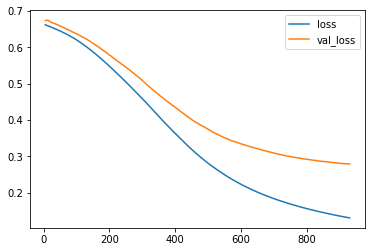

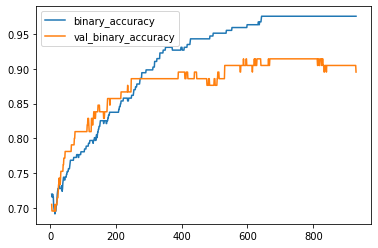

In [10]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

# EXERCISE

使用神經網絡 [**預測酒店預訂中的取消**](https://www.kaggle.com/kernels/fork/11887335) 和 *Hotel Cancellations* 數據集。